In [3]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from IPython.display import display
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\Hp\\Desktop\\train\\train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
missing_postal_code_rows = df[df['Postal Code'].isna()]
print(missing_postal_code_rows)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
2234    2235  CA-2018-104066  05-12-2018  10-12-2018  Standard Class   
5274    5275  CA-2016-162887  07-11-2016  09-11-2016    Second Class   
8798    8799  US-2017-150140  06-04-2017  10-04-2017  Standard Class   
9146    9147  US-2017-165505  23-01-2017  27-01-2017  Standard Class   
9147    9148  US-2017-165505  23-01-2017  27-01-2017  Standard Class   
9148    9149  US-2017-165505  23-01-2017  27-01-2017  Standard Class   
9386    9387  US-2018-127292  19-01-2018  23-01-2018  Standard Class   
9387    9388  US-2018-127292  19-01-2018  23-01-2018  Standard Class   
9388    9389  US-2018-127292  19-01-2018  23-01-2018  Standard Class   
9389    9390  US-2018-127292  19-01-2018  23-01-2018  Standard Class   
9741    9742  CA-2016-117086  08-11-2016  12-11-2016  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United S

In [8]:
df['Postal Code'].fillna(27217.0, inplace=True)  

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
# Convert 'order_date' and "ship date" to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

In [11]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [12]:
# detect duplicated records
df[df.duplicated(subset = None, keep = False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [13]:
# drop Country
df = df.drop(['Country'], axis = 1)

In [14]:
# Identify the region with the most orders
top_region = df['Region'].value_counts().idxmax()
df_top_region = df[df['Region'] == top_region]

print(f"Region with the highest orders: {top_region}")

Region with the highest orders: West


Region with the most orders: West


C:\Users\Hp\AppData\Local\Temp\ipykernel_18232\1408324227.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stockout_products, x="Sub-Category", y="Sales", palette="Reds_r")


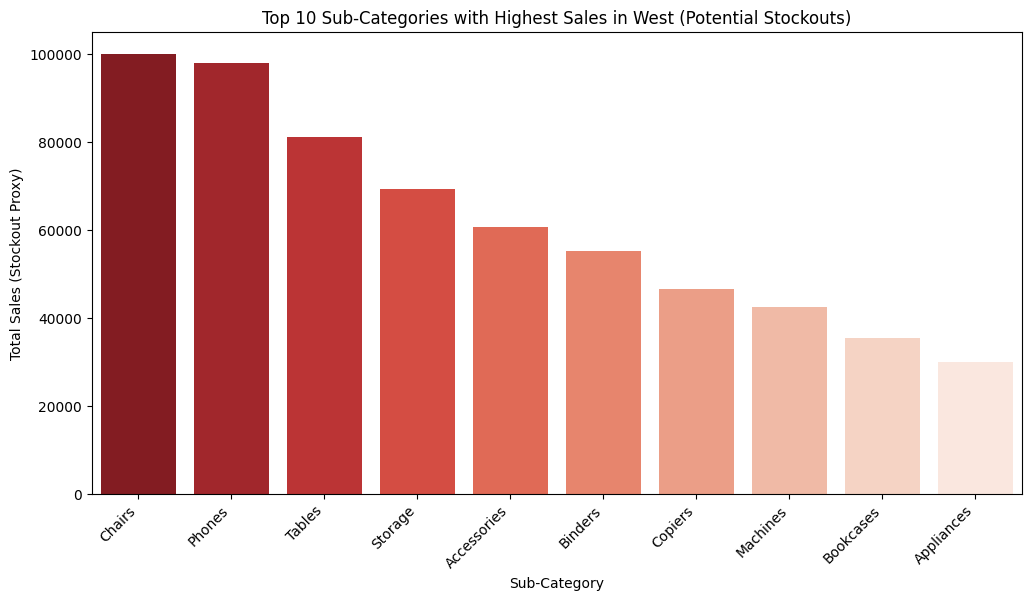


Top 10 High-Demand Sub-ctegories (Possible Stockouts):
   Sub-Category        Sales
5        Chairs  100023.2000
13       Phones   97859.4960
16       Tables   81016.2260
14      Storage   69256.1960
0   Accessories   60632.0060
3       Binders   55173.6330
6       Copiers   46469.3060
11     Machines   42444.1220
4     Bookcases   35320.7915
1    Appliances   29797.1660


In [31]:
import seaborn as sns

# Step 1: Identify the Region with the Most Orders
region_orders = df.groupby("Region")["Order ID"].nunique().reset_index()
region_orders = region_orders.sort_values(by="Order ID", ascending=False)

top_region = region_orders.iloc[0]["Region"]  # Get the top region
print(f"Region with the most orders: {top_region}")

# Step 2: Filter Data for the Top Region
top_region_df = df[df["Region"] == top_region]

# Step 3: Approximate Stockout Rate (Assuming High Sales = High Demand)
product_sales = top_region_df.groupby("Sub-Category")["Sales"].sum().reset_index()

# Step 4: Visualizing Top Stockout-Prone Products (High Demand)
top_stockout_products = product_sales.sort_values(by="Sales", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_stockout_products, x="Sub-Category", y="Sales", palette="Reds_r")
plt.xticks(rotation=45, ha="right")  # Rotate product IDs for better readability
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales (Stockout Proxy)")
plt.title(f"Top 10 Sub-Categories with Highest Sales in {top_region} (Potential Stockouts)")
plt.show()

# Step 5: Display Top 10 High Stockout-Prone Products
print("\nTop 10 High-Demand Sub-ctegories (Possible Stockouts):")
print(top_stockout_products)


In [15]:
# Extract Year-Month for aggregation
df_top_region['Year-Month'] = df_top_region['Ship Date'].dt.to_period('M')

# Aggregate sales by Sub-Category and Year-Month
df_sales_trend = df_top_region.groupby(['Sub-Category', 'Year-Month'])['Sales'].sum().reset_index()

# Convert Year-Month to datetime
df_sales_trend['Year-Month'] = df_sales_trend['Year-Month'].astype(str)
df_sales_trend['Year-Month'] = pd.to_datetime(df_sales_trend['Year-Month'])

print(df_sales_trend.head())


  Sub-Category Year-Month    Sales
0  Accessories 2015-02-01  239.970
1  Accessories 2015-03-01  194.580
2  Accessories 2015-04-01  951.270
3  Accessories 2015-05-01  442.140
4  Accessories 2015-06-01  324.342


C:\Users\Hp\AppData\Local\Temp\ipykernel_18232\3985797867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_region['Year-Month'] = df_top_region['Ship Date'].dt.to_period('M')


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer

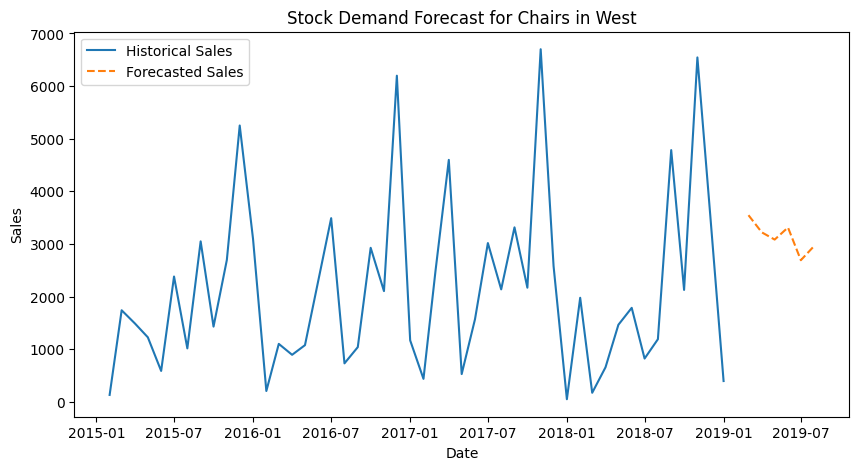

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Select a high-selling sub-category (Top 1 for prediction)
top_subcategory = df_sales_trend.groupby("Sub-Category")["Sales"].sum().idxmax()
df_forecast = df_sales_trend[df_sales_trend["Sub-Category"] == top_subcategory].set_index("Year-Month")

# Train ARIMA model (Order can be tuned)
model = ARIMA(df_forecast['Sales'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df_forecast.index, df_forecast['Sales'], label="Historical Sales")
plt.plot(pd.date_range(start=df_forecast.index[-1], periods=7, freq='M')[1:], forecast, label="Forecasted Sales", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title(f"Stock Demand Forecast for {top_subcategory} in {top_region}")
plt.legend()
plt.show()